# Shallow water model
## HW3
### Kelsey Malloy


### <i>last edited: 11/2020</i>

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from Diagnostics import calc_budget, avg_x, avg_y, d_dx, d_dy
from RKPackage import RK3Step 
from SWE_RHS import SWE_RHS
from Plotting import UpdatePlots
from IC_BC import gauss,BC

### Set geometry

In [2]:
nx = 200 # number of x pts
ny = 200 # number of y pts
lx = 1*10**7 # length of x
ly = 1*10**7 # length of y
dx = float(lx)/nx # distance between x pts
dy = float(ly)/ny # distance between y pts
print(dx,dy)

# centered grid -- p points
xc = (-lx/2)+np.arange(nx)*(dx)
yc = (-ly/2)+np.arange(ny)*(dy)
XP,YP = np.meshgrid(xc,yc)
print('Centered grid shape (pressure points): ',XP.shape)

# x-staggered grid -- u points
xstag = ((-lx/2)-dx/2)+np.arange(nx+1)*dx
print(xc[:2],xc[-2:],xstag[:2],xstag[-2:])
XU,YU = np.meshgrid(xstag,yc)
print('X-staggered grid shape (u points): ',XU.shape)

# y-staggered grid -- v points
ystag = ((-ly/2)-dy/2)+np.arange(ny+1)*dy
print(yc[:2],yc[-2:],ystag[:2],ystag[-2:])
XV,YV = np.meshgrid(xc,ystag)
print('Y-staggered grid shape (v points): ',XV.shape)

# x-staggered and y-staggered -- z points
XZ,YZ = np.meshgrid(xstag,ystag)
print('X- and Y-staggered grid shape (vort points): ',XZ.shape)

50000.0 50000.0
Centered grid shape (pressure points):  (200, 200)
[-5000000. -4950000.] [4900000. 4950000.] [-5025000. -4975000.] [4925000. 4975000.]
X-staggered grid shape (u points):  (200, 201)
[-5000000. -4950000.] [4900000. 4950000.] [-5025000. -4975000.] [4925000. 4975000.]
Y-staggered grid shape (v points):  (201, 200)
X- and Y-staggered grid shape (vort points):  (201, 201)


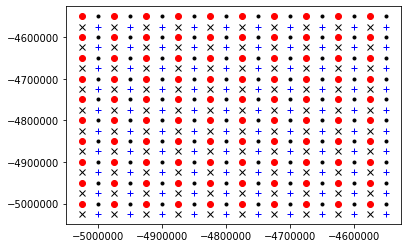

In [3]:
plt.plot(XP[:10,:10],YP[:10,:10],'k.')
plt.plot(XU[:10,:10],YU[:10,:10],'ro')
plt.plot(XV[:10,:10],YV[:10,:10],'b+')
plt.plot(XZ[:10,:10],YZ[:10,:10],'kx')
plt.show()

### Set parameters

In [4]:
g=9.8
depth = 150. 
f = 10**-4 

### Set time step and interval

In [5]:
nt = 1001 # number of timesteps
dt = 100 # timestep interval
CFDtest =  0.1*min(dx, dy)/np.sqrt(g*depth) # test to see if dt is less than CFD limit
print(CFDtest,dt)

snapfreq = 100 # how often to plot or print energy/enstrophy
print((nt-1)/snapfreq)

130.41013273932526 100
10.0


### Initial conditions

In [6]:
# initialize arrays
p = np.zeros((int(nt),ny,nx))
u = np.zeros((int(nt),ny,nx+1))
v = np.zeros((int(nt),ny+1,nx))
z = np.zeros((int(nt),ny+1,nx+1))
depth = depth + np.zeros((ny,nx))
f = f + np.zeros((nx+1,ny+1))

print(p.shape,depth.shape)
print(u.shape,v.shape)
print(z.shape,f.shape)

(1001, 200, 200) (200, 200)
(1001, 200, 201) (1001, 201, 200)
(1001, 201, 201) (201, 201)


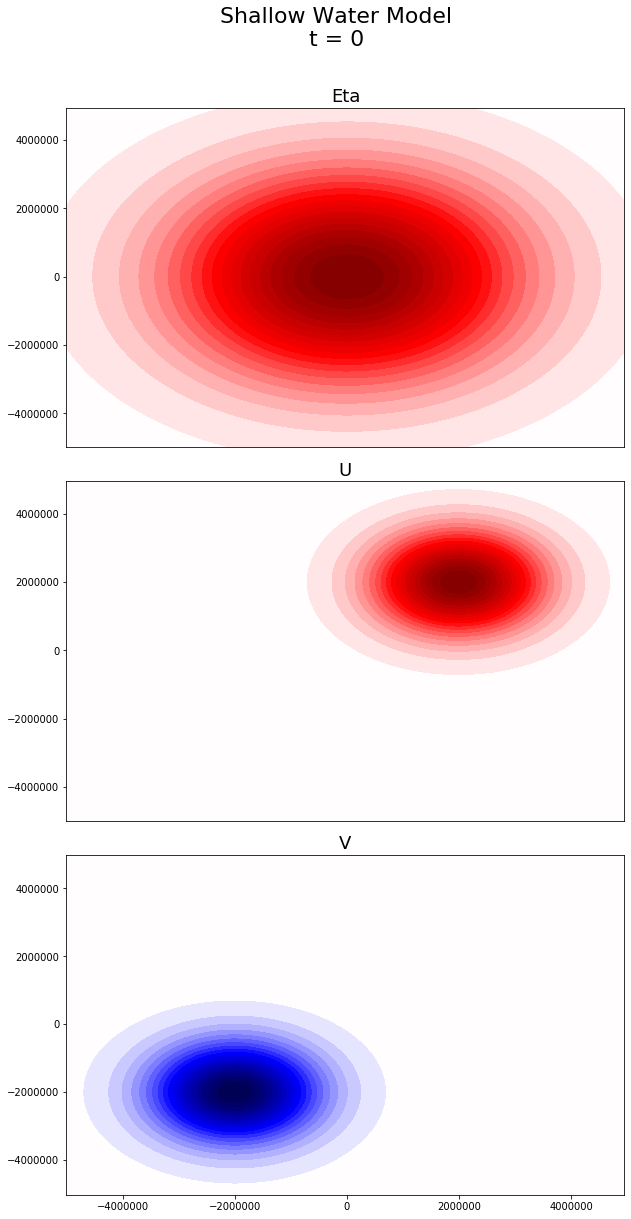

In [7]:
# gaussian bubble for eta
p[0] = gauss(XP,YP,0,0,1,2*10**6)
u[0] = gauss(XU,YU,4*10**6,4*10**6,1,1*10**6)
v[0] = gauss(XV,YV,-4*10**6,-4*10**6,-1,1*10**6)
UpdatePlots(0,p[0],u[0],v[0],XP,YP,XU,YU,XV,YV)

In [8]:
# initial budget
energy0, enstrophy0 = calc_budget(p[0],u[0],v[0],depth+p[0],f,g,dx,dy)

print('Initial Energy: ',np.max(energy0))
print('Initial Enstrophy: ',np.max(enstrophy0))

Initial Energy:  75.8001073274252
Initial Enstrophy:  6.739130207485998e-11


### Iterations

\u0394Energy:  7.57522386720666e-05
\u0394Enstrophy:  2.7814380567799314e-16


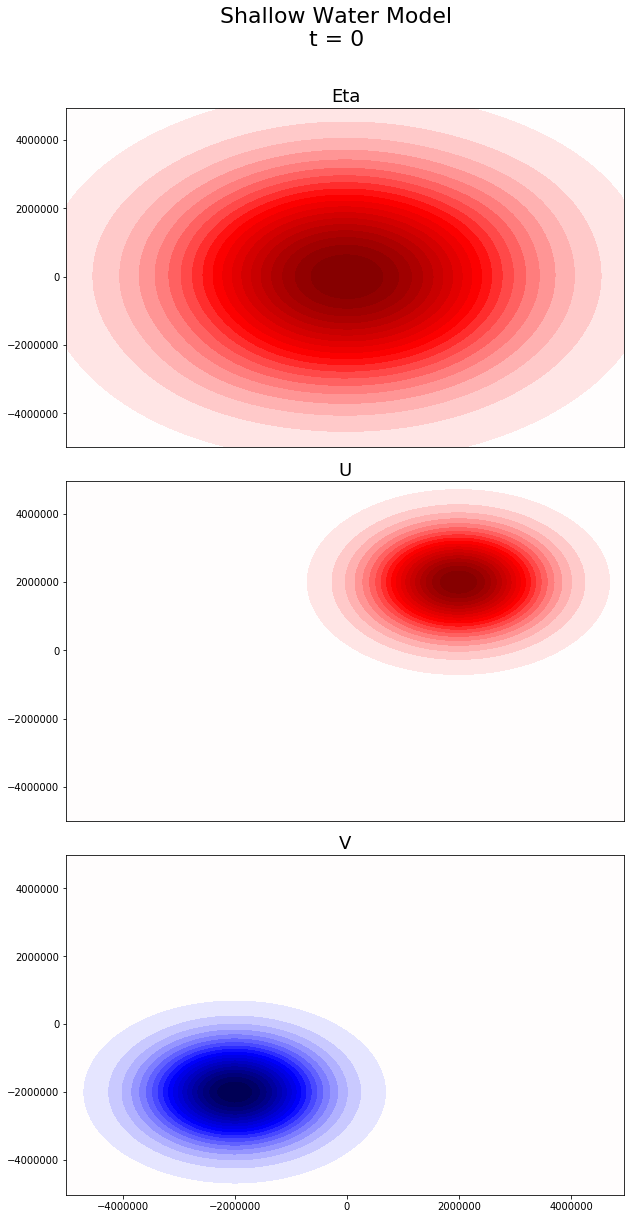

\u0394Energy:  0.08044067367852392
\u0394Enstrophy:  -8.755030931146324e-14


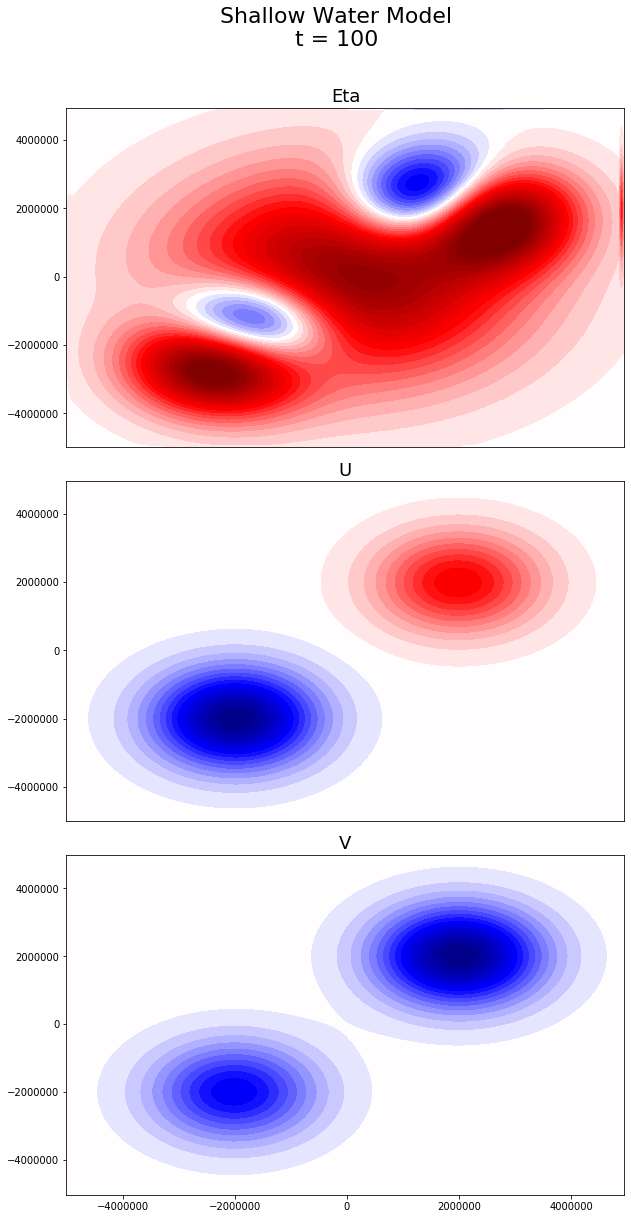

\u0394Energy:  0.6610385141499506
\u0394Enstrophy:  -1.5913356371005496e-13


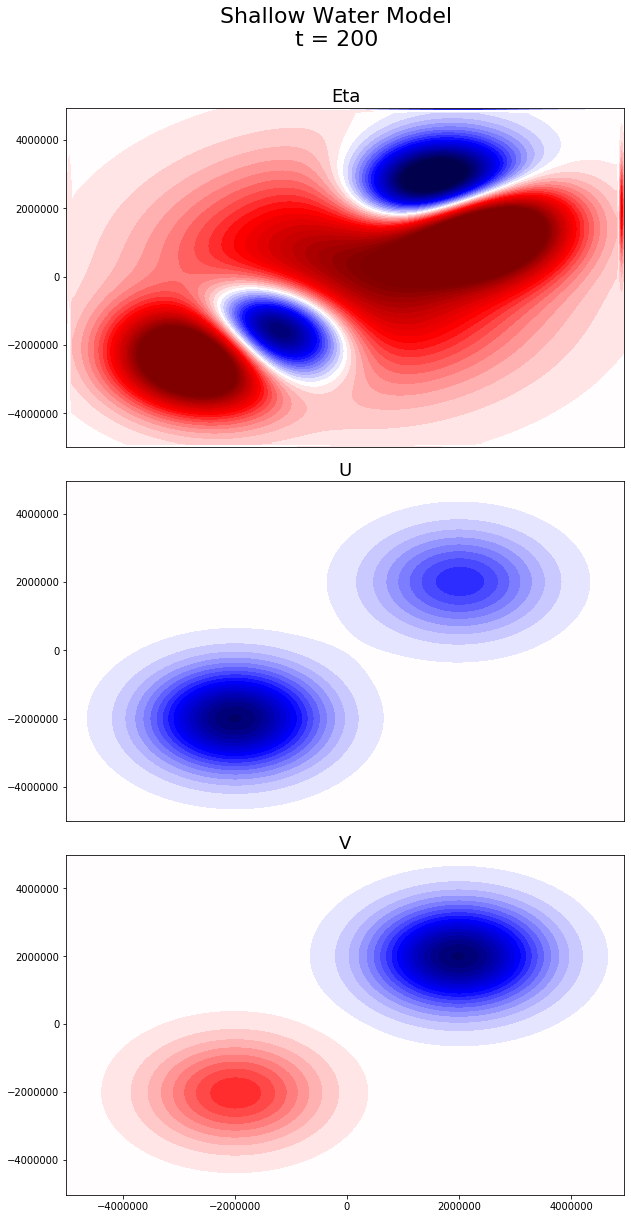

\u0394Energy:  1.5136549941779833
\u0394Enstrophy:  2.9133653941721025e-13


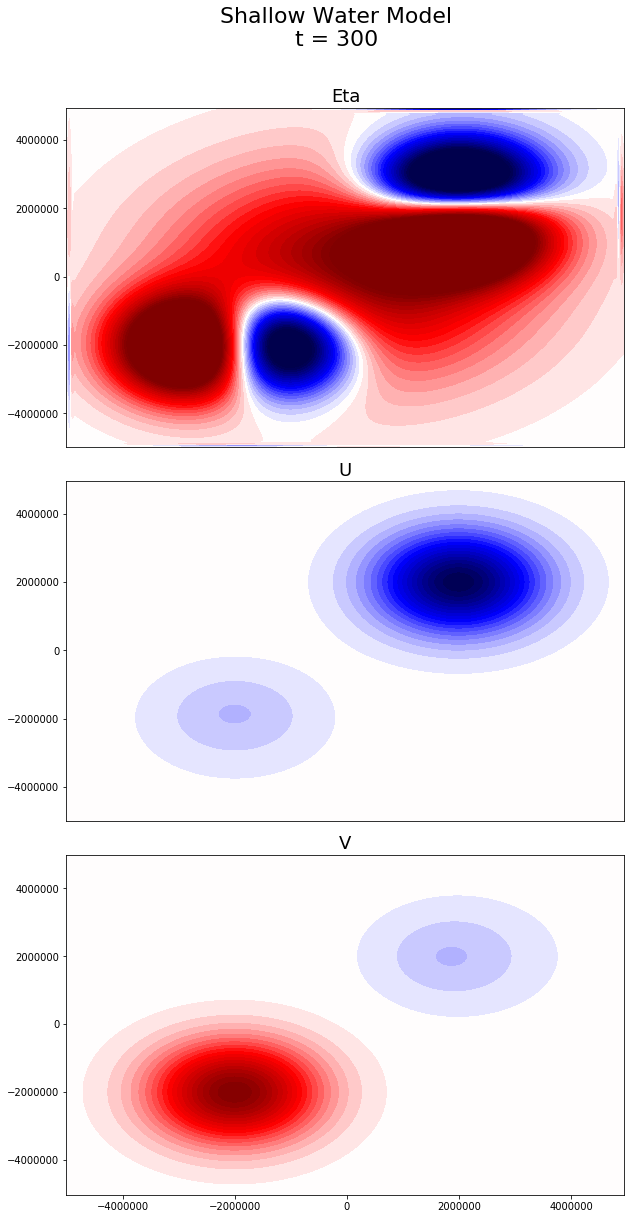

\u0394Energy:  1.0759559043416118
\u0394Enstrophy:  5.953194163313976e-13


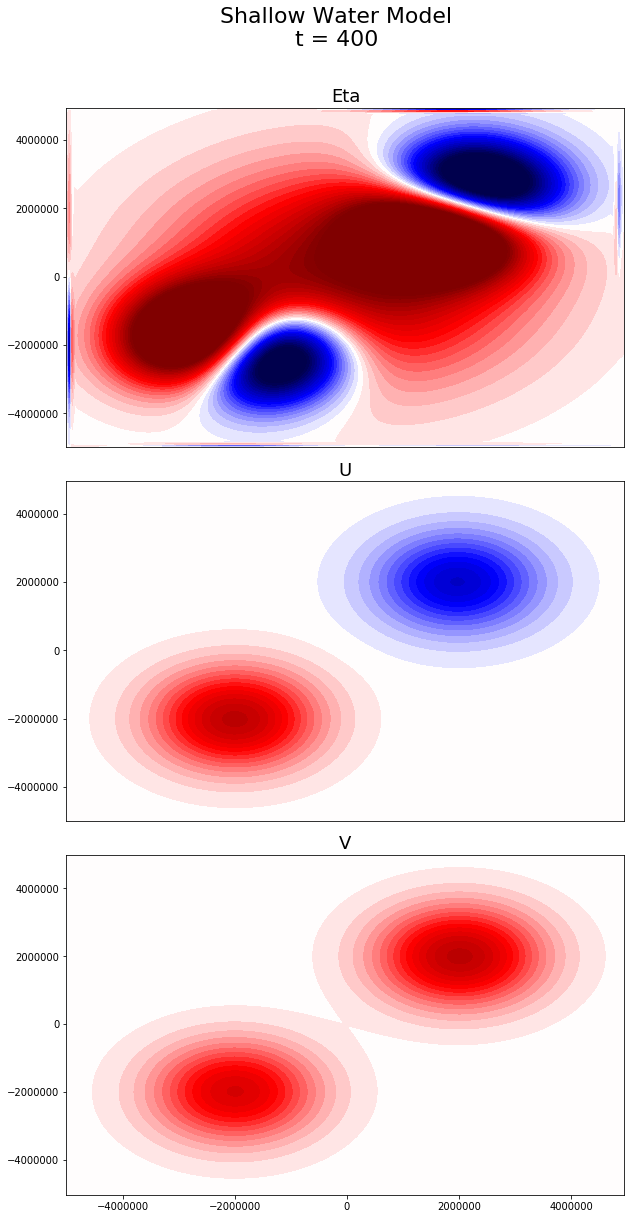

\u0394Energy:  0.2990991860562531
\u0394Enstrophy:  7.419633326906767e-13


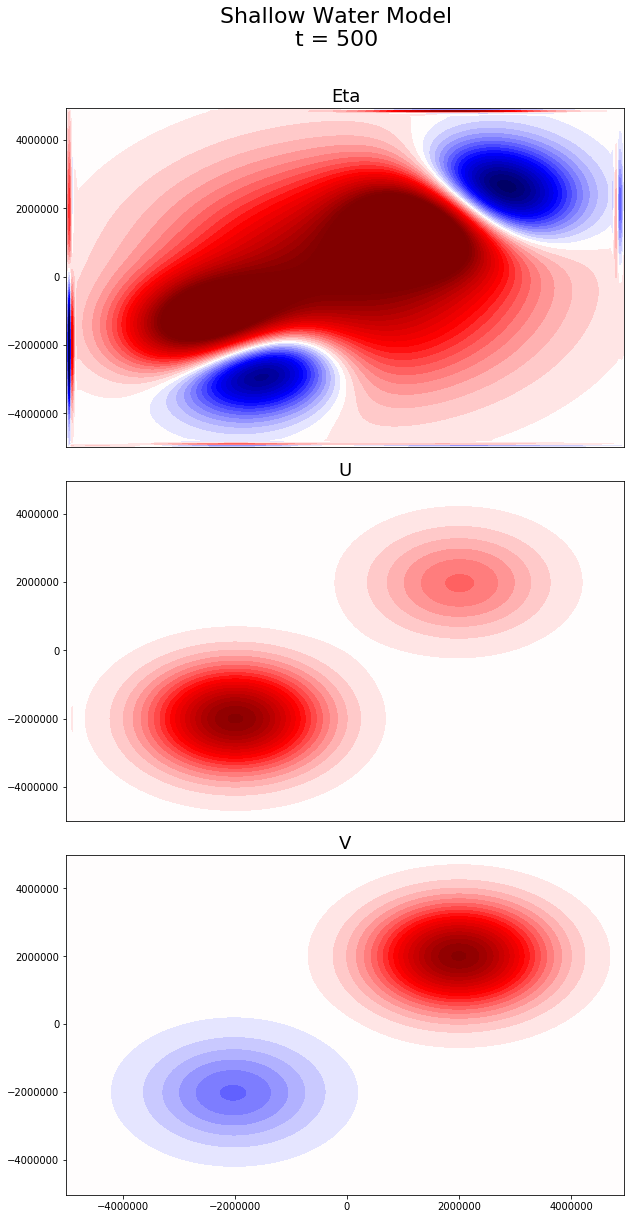

\u0394Energy:  -0.002031020330051092
\u0394Enstrophy:  8.649021516229656e-13


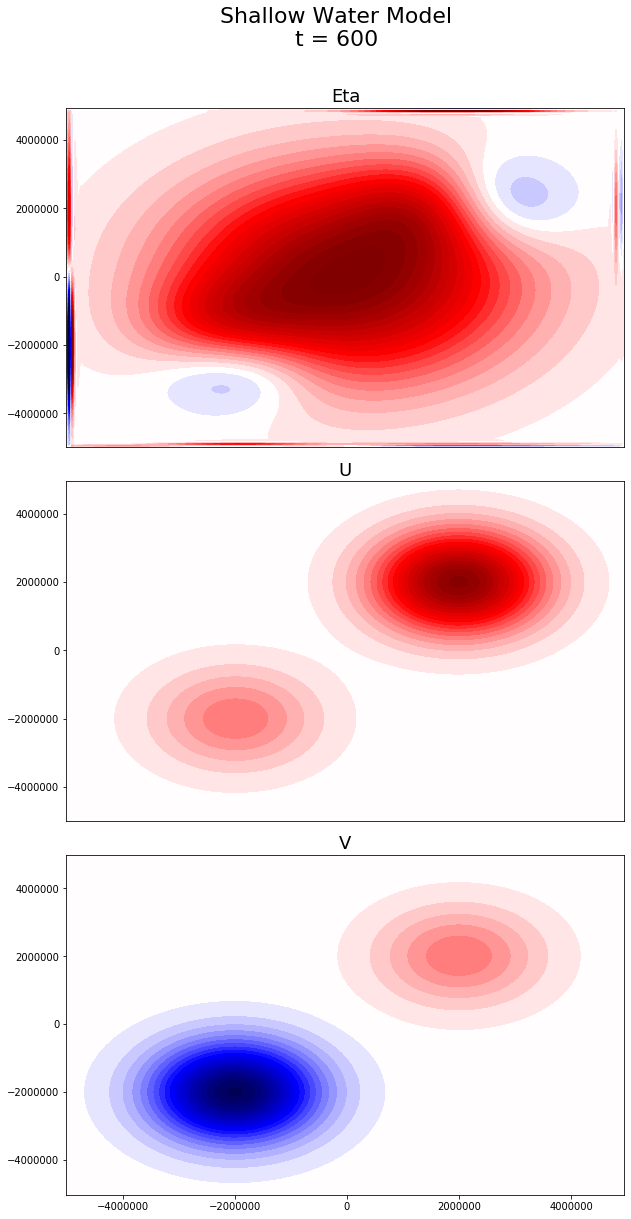

\u0394Energy:  23.12150304525744
\u0394Enstrophy:  1.113717816333874e-12


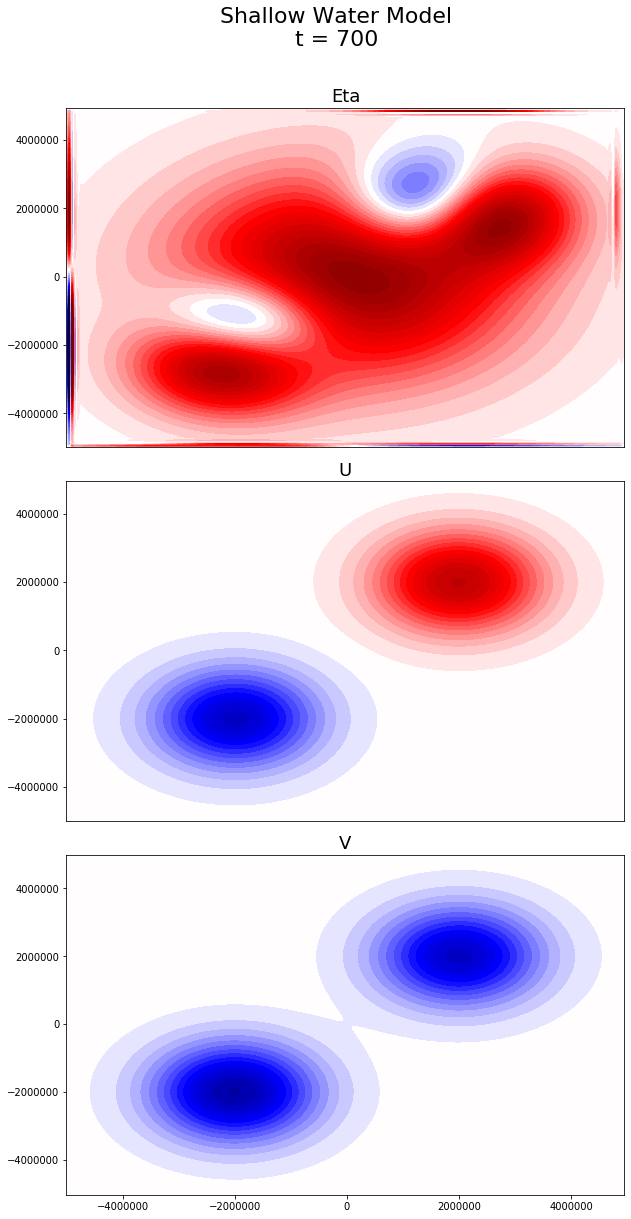

\u0394Energy:  68.06635575403712
\u0394Enstrophy:  1.5290365175471404e-12


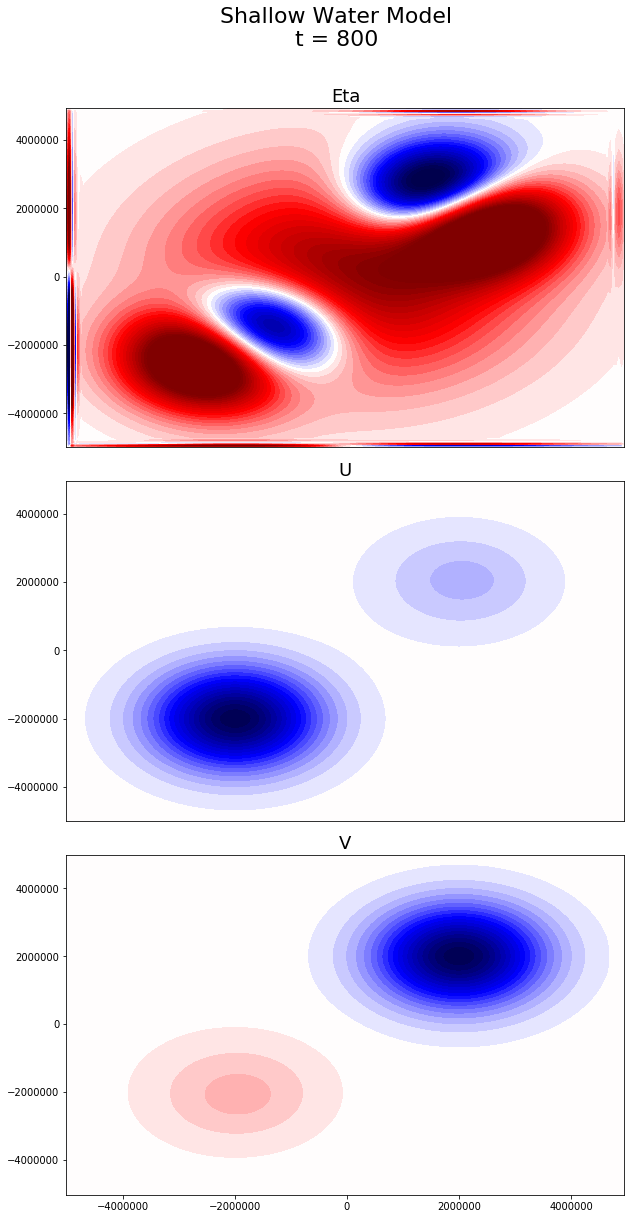

\u0394Energy:  122.71791032240102
\u0394Enstrophy:  2.021040595677409e-12


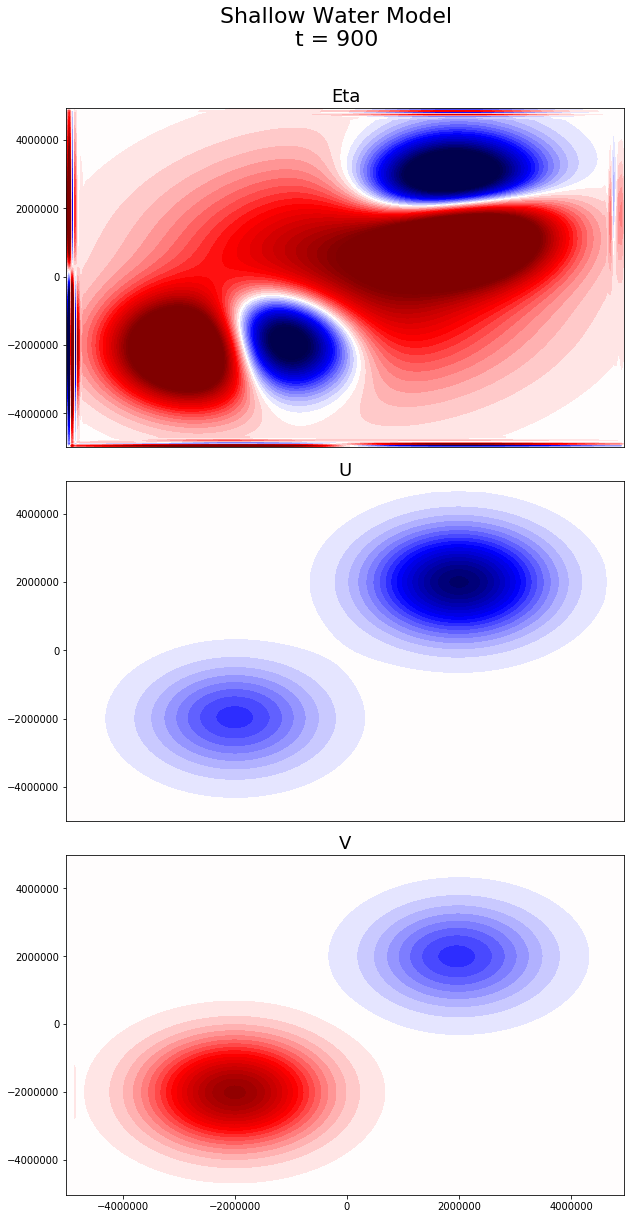

In [9]:
for it in range(nt-1):
    p[it+1],u[it+1],v[it+1] = RK3Step(p[it],u[it],v[it],f,depth,g,dx,dy,dt)
    BC(u[it+1],v[it+1],0)
    if (it%snapfreq == 0):
        # diagnostics
        energy,enstrophy = calc_budget(p[it+1],u[it+1],v[it+1],depth+p[it+1],f,g,dx,dy)
        print(b'\u0394Energy: '.decode('utf-8'),np.max(energy)-np.max(energy0))
        print(b'\u0394Enstrophy: '.decode('utf-8'),np.max(enstrophy)-np.max(enstrophy0))

        # plot solution
        UpdatePlots(it,p[it+1],u[it+1],v[it+1],XP,YP,XU,YU,XV,YV)